## 0. Import Libraries

In [1]:
import numpy as np
import xarray as xr

## 1. Open Data

In [2]:
# change these
season = 'JJA' # DJF, JJA,
time_resample = 6 # options: 1, 3, 6 (resampling)

# bias algorithm
bias_algo = 'QDM'

# path for resampling information
if time_resample != 1:
    path_resample = fr'{time_resample}hrsum'
else:
    path_resample = fr'{time_resample}hr'
    
# general data path
path_general = fr'/mnt/d/JupyterLab/Yuksek_Lisans/msc_thesis_data'

# variable name
name_variable_cosmo = 'TOT_PREC'

# saving path (saving with cosmo var name for both era5 and cosmo)
path_save = fr'data/{name_variable_cosmo}/'

# years
years = np.arange(1985, 2006, dtype=int)

In [3]:
# open data
path_dt = fr'{path_general}/cosmo/yearly/BC/BC_{bias_algo}_Tr011_MPI_RF_PR_{season}_{path_resample}_merged_198501_200512.nc'
    
# chunk recommendation from chatGPT
dt_cosmo = xr.open_dataset(path_dt, 
                     #chunks={'rlat':2,
                     #        'rlon':2
                     #        }
                    )[name_variable_cosmo]

In [4]:
dt_cosmo

<xarray.DataArray 'TOT_PREC' (time: 7748, rlat: 59, rlon: 137)>
[62627084 values with dtype=float64]
Coordinates:
  * rlon     (rlon) float32 -5.55 -5.44 -5.33 -5.22 -5.11 ... 9.08 9.19 9.3 9.41
  * rlat     (rlat) float32 -4.11 -4.0 -3.89 -3.78 -3.67 ... 1.94 2.05 2.16 2.27
  * time     (time) datetime64[ns] 1985-06-01 ... 2005-08-31T18:00:00
    lon      (rlat, rlon) float32 ...
    lat      (rlat, rlon) float32 ...

## 2. Calculate Indices

### 2.1 Intensity Indices

In [5]:
def calculate_intensity_index(dt, time_resample):
    
    # groupby and find maximum (rx_xhr)
    rx_xhr = dt.groupby('time.year').reduce(np.max, 
                                            dim='time', 
                                            keep_attrs=True
                                           )

    # Add information about the computation to the dataset's attributes
    rx_xhr.attrs['computation'] = 'grouped by year and took maximum over time dimension'
    rx_xhr.attrs['indice_name'] = fr'rx{time_resample}hr'
    
    return rx_xhr

In [6]:
# calculate intensity index
intensity_idx_cosmo = calculate_intensity_index(dt_cosmo, 
                                               time_resample)

In [7]:
intensity_idx_cosmo

<xarray.DataArray 'TOT_PREC' (year: 21, rlat: 59, rlon: 137)>
array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
...
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]])
Coordinates:
  * rlon     (rlon) float32 -5.55 -5.44 -5.33 -5.22 -5.11 ... 9.08 9.19 9.3 9.41
  * rlat     (rlat) float32 -4.11 -4.0 -3.89 -3.78 -3.67 ... 1.94 2.05 2.16 2.27
    lon      (rlat, rlon) float32 26.18 26.31 26.45 26.58 ... 45.33 45.47 45.62
    lat      (rlat, rlon) float32 35.68 35.69 35.69 35.7 ... 41.63 41.62 41.6
  * year     (year) int64 1985 1986 1987 1988 1989 ... 2001 2002 2003 2004 2005
Attributes:
    computation:  grouped by year and took maximum over time dimension
    indice_name:  rx6hr

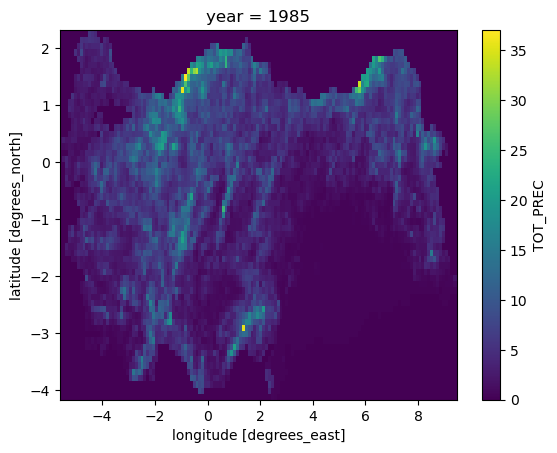

In [8]:
intensity_idx_cosmo[0].plot()

In [9]:
# save index as nc
indice_name = intensity_idx_cosmo.attrs['indice_name']
intensity_idx_cosmo.to_netcdf(fr"{path_save}/cosmo/BC/BC_{bias_algo}_Tr011_MPI_RF_PR_{season}_{path_resample}_{indice_name}_198501_200512.nc")

In [26]:
#(xr.open_dataset(r'data/TOT_PREC/era5/era5_JJA_intensity_rx3hr_198501_200512.nc')['tp']*1e3)[0].plot()

In [27]:
#(xr.open_dataset(r'data/TOT_PREC/cosmo/cosmo_JJA_intensity_rx3hr_198501_200512.nc')['TOT_PREC'])[0].plot()

### 2.2. Absolute Indices

In [20]:
p99_xhr  = dt.quantile(0.99,
               dim='time',
                )

In [ ]:
kk = dt.where(dt>p99_xhr)#.count(dim='time')

In [ ]:
for year in years:
    
    Rxhr95p_xyear = dt.sel(time=str(year)).where(dt.sel(time=str(year))>p95_xhr)\
                      .groupby('time.year')\
                      .count(dim='time')
    
    # Add information about the computation to the dataset's attributes
    Rxhr95p.attrs['computation'] = 'calculated p95 grouped by year and count above 95p over time dimension'
    Rxhr95p.attrs['indice_name'] = fr'R{time_resample}hr95P'
    
    # save
    Rxhr95p.to_netcdf(fr"{path_save}{name_dt}_{season}_absolute_{Rxhr95p.attrs['indice_name']}_year{year}_198501_200512.nc")
    pri

In [9]:
# group data by year and count exceedances in time dimension
Rxhr95p = dt.where(dt>dt.quantile(0.95,
                       dim='time',
                       keep_attrs=True
                        )
                  )\
            .groupby('time.year')\
            .count(dim='time')

# Add information about the computation to the dataset's attributes
Rxhr95p.attrs['computation'] = 'calculated p95 grouped by year and count above 95p over time dimension'
Rxhr95p.attrs['indice_name'] = fr'R{time_resample}hr95P'

In [10]:
Rxhr95pt.to_netcdf(fr"{path_save}{name_dt}_{season}_absolute_{Rxhr95p.attrs['indice_name']}_198501_200512.nc")


KeyboardInterrupt

